In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
traffic = pd.read_csv("../data/raw/traffic_data.csv")

In [3]:
len(traffic)

7990

In [4]:
traffic.columns

Index(['traffic_delay', 'hour', 'day_of_week', 'minute', 'duration_seconds',
       'destination', 'duration_traffic_seconds', 'distance_meters', 'origin',
       'is_weekend', 'timestamp', 'id'],
      dtype='object')

In [5]:
traffic.dtypes

traffic_delay                int64
hour                         int64
day_of_week                  int64
minute                       int64
duration_seconds             int64
destination                 object
duration_traffic_seconds     int64
distance_meters              int64
origin                      object
is_weekend                    bool
timestamp                   object
id                          object
dtype: object

In [6]:
traffic.hour.min(), traffic.hour.max()

(0, 23)

In [7]:
traffic.day_of_week.min(), traffic.day_of_week.max()

(0, 6)

In [8]:
traffic.destination.unique()

array(['Stasiun Lempuyangan, Yogyakarta', 'Stasiun Tugu, Yogyakarta',
       'Tugu Jogja, Yogyakarta', 'Malioboro, Yogyakarta',
       'Kota Gede, Yogyakarta', 'Prawirotaman, Yogyakarta'], dtype=object)

In [9]:
traffic.isnull().mean()

traffic_delay               0.0
hour                        0.0
day_of_week                 0.0
minute                      0.0
duration_seconds            0.0
destination                 0.0
duration_traffic_seconds    0.0
distance_meters             0.0
origin                      0.0
is_weekend                  0.0
timestamp                   0.0
id                          0.0
dtype: float64

In [10]:
traffic.describe()

,traffic_delay,hour,day_of_week,minute,duration_seconds,duration_traffic_seconds,distance_meters
count,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000
mean,7.755194,11.517397,2.525407,29.483605,674.465457,682.220651,3989.378598
std,154.754548,7.105160,2.228423,17.291299,259.685278,287.835057,1782.404701
min,-447.000000,0.000000,0.000000,0.000000,400.000000,283.000000,2131.000000
25%,-93.000000,5.000000,1.000000,15.000000,464.000000,465.000000,2742.000000
50%,16.000000,12.000000,2.000000,29.000000,589.000000,582.500000,3486.000000
75%,93.000000,18.000000,5.000000,44.000000,840.000000,826.000000,5591.000000
max,852.000000,23.000000,6.000000,59.000000,1280.000000,1837.000000,9087.000000


Text(0, 0.5, 'frequency')

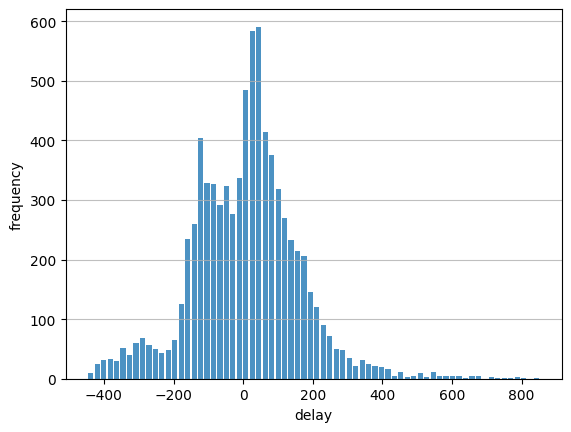

In [11]:
n, bins, patches = plt.hist(
    x=traffic['traffic_delay'], bins='auto',
    alpha=0.8, rwidth=0.8
)
plt.grid(axis='y', alpha=0.8)
plt.xlabel('delay')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

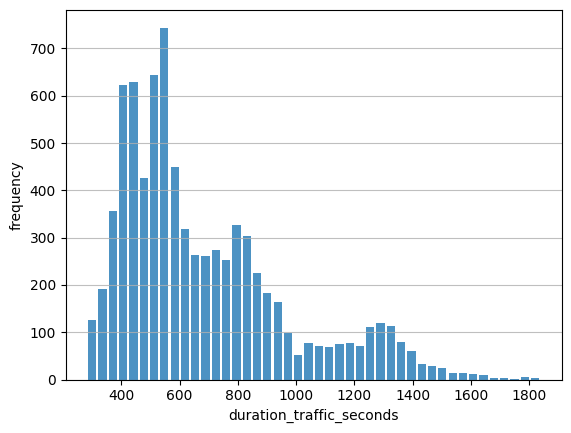

In [12]:
n, bins, patches = plt.hist(
    x=traffic['duration_traffic_seconds'], bins='auto',
    alpha=0.8, rwidth=0.8
)
plt.grid(axis='y', alpha=0.8)
plt.xlabel('duration_traffic_seconds')
plt.ylabel('frequency')

In [13]:
from scipy import stats

def ignore_nans(a, b):
    index = ~a.isnull() & ~b.isnull()
    return a[index], b[index]

stats.pearsonr(*ignore_nans(traffic['hour'], traffic['traffic_delay']))

PearsonRResult(statistic=0.568382990157801, pvalue=0.0)

Text(37.722222222222214, 0.5, 'traffic_delay')

<Figure size 1200x600 with 0 Axes>

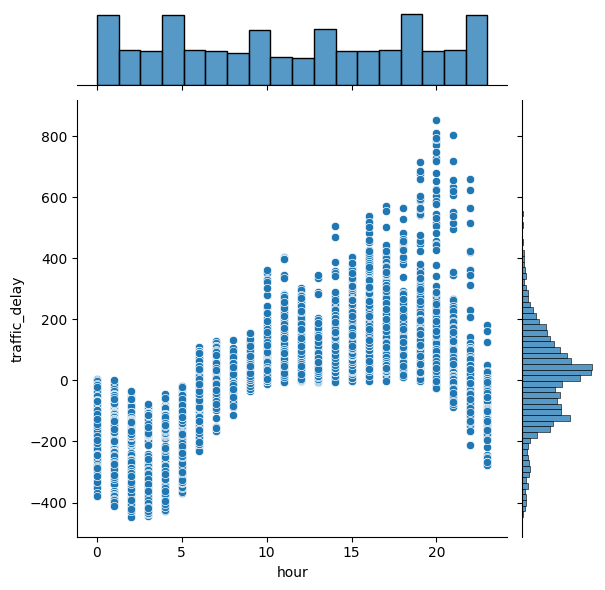

In [14]:
plt.figure(figsize=(12,6))
sns.jointplot(
    x='hour', y='traffic_delay',
    edgecolor='white', data=traffic
)
plt.xlabel("hour")
plt.ylabel("traffic_delay")

Text(0, 0.5, 'traffic delay')

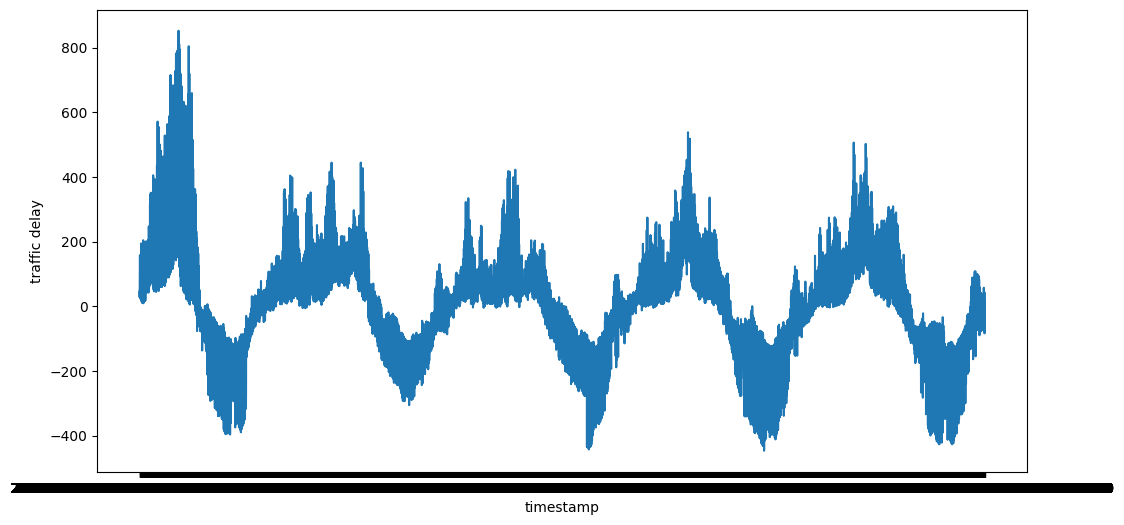

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(data=traffic, x="timestamp", y="traffic_delay")
plt.ylabel("traffic delay")

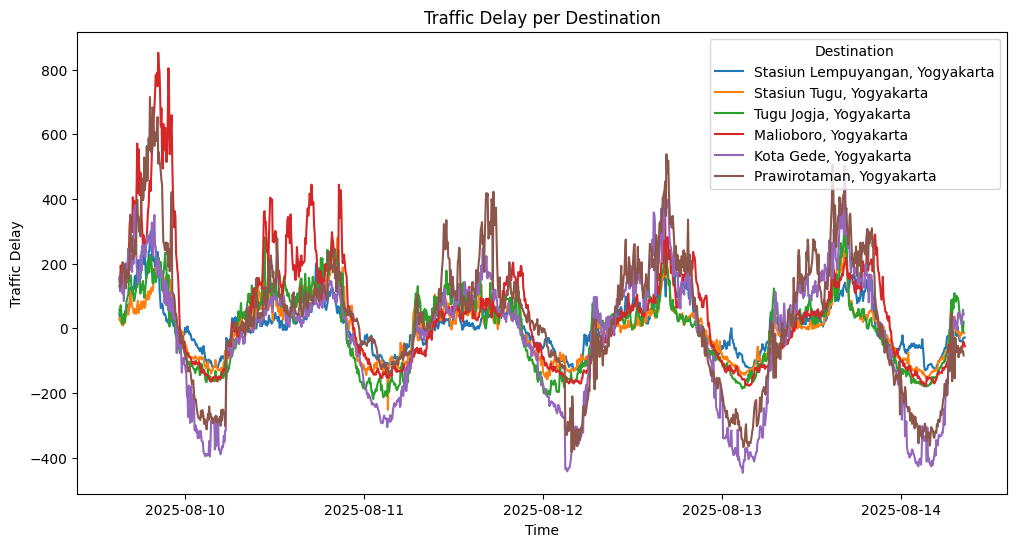

In [16]:
traffic['timestamp'] = pd.to_datetime(traffic['timestamp'])

plt.figure(figsize=(12,6))
sns.lineplot(data=traffic, x='timestamp', y='traffic_delay', hue='destination', palette='tab10')
plt.title("Traffic Delay per Destination")
plt.ylabel("Traffic Delay")
plt.xlabel("Time")
plt.legend(title="Destination")
plt.show()

In [17]:
def fit(X, y, degree=2):
    coef = np.polyfit(X, y, degree)
    trendpoly = np.poly1d(coef)
    return trendpoly(X)

def get_trend(s, degree=2):
    X = list(range(len(s)))
    trend = fit(X, s.values, degree)
    return pd.Series(data=trend, index=s.index)

def get_season(s, period=24, degree=2):
    X = [i % period for i in range(len(s))]
    seasonal = fit(X, s.values, degree)
    return pd.Series(data=seasonal, index=s.index)

In [18]:
s = traffic.set_index('timestamp')['traffic_delay']

In [19]:
trend = get_trend(s)
season = get_season(s)

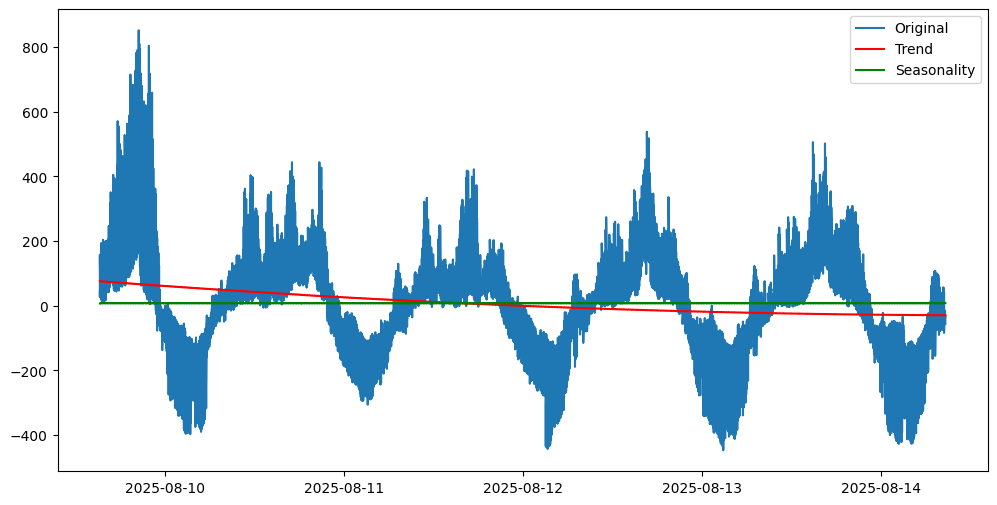

In [20]:
plt.figure(figsize=(12,6))
plt.plot(s.index, s, label='Original')
plt.plot(trend.index, trend, label='Trend', color='red')
plt.plot(season.index, season, label='Seasonality', color='green')
plt.legend()
plt.show()

In [21]:
traffic

,traffic_delay,hour,day_of_week,minute,duration_seconds,destination,duration_traffic_seconds,distance_meters,origin,is_weekend,timestamp,id
0,45,15,5,15,464,"Stasiun Lempuyangan, Yogyakarta",509,2618,"Universitas Gadjah Mada, Yogyakarta",True,2025-08-09 15:15:05.661242+07:00,2025-08-09T15-15-05.661242+07-00_Universitas_G...
1,28,15,5,15,528,"Stasiun Tugu, Yogyakarta",556,3075,"Universitas Gadjah Mada, Yogyakarta",True,2025-08-09 15:15:05.806848+07:00,2025-08-09T15-15-05.806848+07-00_Universitas_G...
2,58,15,5,15,518,"Tugu Jogja, Yogyakarta",576,2816,"Universitas Gadjah Mada, Yogyakarta",True,2025-08-09 15:15:05.904792+07:00,2025-08-09T15-15-05.904792+07-00_Universitas_G...
3,152,15,5,15,589,"Malioboro, Yogyakarta",741,3486,"Universitas Gadjah Mada, Yogyakarta",True,2025-08-09 15:15:05.985405+07:00,2025-08-09T15-15-05.985405+07-00_Universitas_G...
4,158,15,5,15,1136,"Kota Gede, Yogyakarta",1294,7703,"Universitas Gadjah Mada, Yogyakarta",True,2025-08-09 15:15:06.141453+07:00,2025-08-09T15-15-06.141453+07-00_Universitas_G...
...,...,...,...,...,...,...,...,...,...,...,...,...
7985,-84,8,3,26,1114,"Prawirotaman, Yogyakarta",1030,6342,"Universitas Gadjah Mada, Yogyakarta",False,2025-08-14 08:26:28.882892+07:00,2025-08-14T08-26-28.882892+07-00_Universitas_G...
7986,-15,8,3,31,528,"Stasiun Tugu, Yogyakarta",513,3075,"Universitas Gadjah Mada, Yogyakarta",False,2025-08-14 08:31:33.453526+07:00,2025-08-14T08-31-33.453526+07-00_Universitas_G...
7987,-50,8,3,31,589,"Malioboro, Yogyakarta",539,3486,"Universitas Gadjah Mada, Yogyakarta",False,2025-08-14 08:31:33.593414+07:00,2025-08-14T08-31-33.593414+07-00_Universitas_G...
7988,-29,8,3,36,464,"Stasiun Lempuyangan, Yogyakarta",435,2618,"Universitas Gadjah Mada, Yogyakarta",False,2025-08-14 08:36:40.684604+07:00,2025-08-14T08-36-40.684604+07-00_Universitas_G...


In [22]:
traffic['timestamp'] = pd.to_datetime(traffic['timestamp'])
traffic['timestamp_5min'] = traffic['timestamp'].dt.floor('5min')

In [23]:
traffic

,traffic_delay,hour,day_of_week,minute,duration_seconds,destination,duration_traffic_seconds,distance_meters,origin,is_weekend,timestamp,id,timestamp_5min
0,45,15,5,15,464,"Stasiun Lempuyangan, Yogyakarta",509,2618,"Universitas Gadjah Mada, Yogyakarta",True,2025-08-09 15:15:05.661242+07:00,2025-08-09T15-15-05.661242+07-00_Universitas_G...,2025-08-09 15:15:00+07:00
1,28,15,5,15,528,"Stasiun Tugu, Yogyakarta",556,3075,"Universitas Gadjah Mada, Yogyakarta",True,2025-08-09 15:15:05.806848+07:00,2025-08-09T15-15-05.806848+07-00_Universitas_G...,2025-08-09 15:15:00+07:00
2,58,15,5,15,518,"Tugu Jogja, Yogyakarta",576,2816,"Universitas Gadjah Mada, Yogyakarta",True,2025-08-09 15:15:05.904792+07:00,2025-08-09T15-15-05.904792+07-00_Universitas_G...,2025-08-09 15:15:00+07:00
3,152,15,5,15,589,"Malioboro, Yogyakarta",741,3486,"Universitas Gadjah Mada, Yogyakarta",True,2025-08-09 15:15:05.985405+07:00,2025-08-09T15-15-05.985405+07-00_Universitas_G...,2025-08-09 15:15:00+07:00
4,158,15,5,15,1136,"Kota Gede, Yogyakarta",1294,7703,"Universitas Gadjah Mada, Yogyakarta",True,2025-08-09 15:15:06.141453+07:00,2025-08-09T15-15-06.141453+07-00_Universitas_G...,2025-08-09 15:15:00+07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,-84,8,3,26,1114,"Prawirotaman, Yogyakarta",1030,6342,"Universitas Gadjah Mada, Yogyakarta",False,2025-08-14 08:26:28.882892+07:00,2025-08-14T08-26-28.882892+07-00_Universitas_G...,2025-08-14 08:25:00+07:00
7986,-15,8,3,31,528,"Stasiun Tugu, Yogyakarta",513,3075,"Universitas Gadjah Mada, Yogyakarta",False,2025-08-14 08:31:33.453526+07:00,2025-08-14T08-31-33.453526+07-00_Universitas_G...,2025-08-14 08:30:00+07:00
7987,-50,8,3,31,589,"Malioboro, Yogyakarta",539,3486,"Universitas Gadjah Mada, Yogyakarta",False,2025-08-14 08:31:33.593414+07:00,2025-08-14T08-31-33.593414+07-00_Universitas_G...,2025-08-14 08:30:00+07:00
7988,-29,8,3,36,464,"Stasiun Lempuyangan, Yogyakarta",435,2618,"Universitas Gadjah Mada, Yogyakarta",False,2025-08-14 08:36:40.684604+07:00,2025-08-14T08-36-40.684604+07-00_Universitas_G...,2025-08-14 08:35:00+07:00


In [24]:
traffic.to_csv("traffic_5min.csv")

In [25]:
counts = traffic.groupby('timestamp_5min').size()
print(counts[counts > 6])

timestamp_5min
2025-08-10 18:15:00+07:00    24
dtype: int64


In [26]:
abnormal_batches = counts[counts > 6].index
abnormal_records = traffic[traffic['timestamp_5min'].isin(abnormal_batches)]
print(abnormal_records)

      traffic_delay  hour  day_of_week  minute  duration_seconds  \
1902            148    18            6      15               400   
1903            152    18            6      15               654   
1904            216    18            6      15               704   
1905            133    18            6      15               448   
1906             76    18            6      15               840   
1907            129    18            6      15               462   
1908            150    18            6      15               400   
1909            165    18            6      15               654   
1910            211    18            6      15               704   
1911            145    18            6      15               448   
1912             78    18            6      15               840   
1913            132    18            6      15               462   
1914            146    18            6      16               400   
1915            163    18            6      16  

In [27]:
# Filter data, drop yang termasuk batch abnormal
traffic_cleaned = traffic.drop(traffic.index[1902:1920])

In [28]:
traffic_cleaned

,traffic_delay,hour,day_of_week,minute,duration_seconds,destination,duration_traffic_seconds,distance_meters,origin,is_weekend,timestamp,id,timestamp_5min
0,45,15,5,15,464,"Stasiun Lempuyangan, Yogyakarta",509,2618,"Universitas Gadjah Mada, Yogyakarta",True,2025-08-09 15:15:05.661242+07:00,2025-08-09T15-15-05.661242+07-00_Universitas_G...,2025-08-09 15:15:00+07:00
1,28,15,5,15,528,"Stasiun Tugu, Yogyakarta",556,3075,"Universitas Gadjah Mada, Yogyakarta",True,2025-08-09 15:15:05.806848+07:00,2025-08-09T15-15-05.806848+07-00_Universitas_G...,2025-08-09 15:15:00+07:00
2,58,15,5,15,518,"Tugu Jogja, Yogyakarta",576,2816,"Universitas Gadjah Mada, Yogyakarta",True,2025-08-09 15:15:05.904792+07:00,2025-08-09T15-15-05.904792+07-00_Universitas_G...,2025-08-09 15:15:00+07:00
3,152,15,5,15,589,"Malioboro, Yogyakarta",741,3486,"Universitas Gadjah Mada, Yogyakarta",True,2025-08-09 15:15:05.985405+07:00,2025-08-09T15-15-05.985405+07-00_Universitas_G...,2025-08-09 15:15:00+07:00
4,158,15,5,15,1136,"Kota Gede, Yogyakarta",1294,7703,"Universitas Gadjah Mada, Yogyakarta",True,2025-08-09 15:15:06.141453+07:00,2025-08-09T15-15-06.141453+07-00_Universitas_G...,2025-08-09 15:15:00+07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,-84,8,3,26,1114,"Prawirotaman, Yogyakarta",1030,6342,"Universitas Gadjah Mada, Yogyakarta",False,2025-08-14 08:26:28.882892+07:00,2025-08-14T08-26-28.882892+07-00_Universitas_G...,2025-08-14 08:25:00+07:00
7986,-15,8,3,31,528,"Stasiun Tugu, Yogyakarta",513,3075,"Universitas Gadjah Mada, Yogyakarta",False,2025-08-14 08:31:33.453526+07:00,2025-08-14T08-31-33.453526+07-00_Universitas_G...,2025-08-14 08:30:00+07:00
7987,-50,8,3,31,589,"Malioboro, Yogyakarta",539,3486,"Universitas Gadjah Mada, Yogyakarta",False,2025-08-14 08:31:33.593414+07:00,2025-08-14T08-31-33.593414+07-00_Universitas_G...,2025-08-14 08:30:00+07:00
7988,-29,8,3,36,464,"Stasiun Lempuyangan, Yogyakarta",435,2618,"Universitas Gadjah Mada, Yogyakarta",False,2025-08-14 08:36:40.684604+07:00,2025-08-14T08-36-40.684604+07-00_Universitas_G...,2025-08-14 08:35:00+07:00


In [29]:
traffic_cleaned.to_csv("../data/raw/traffic5min_data.csv")

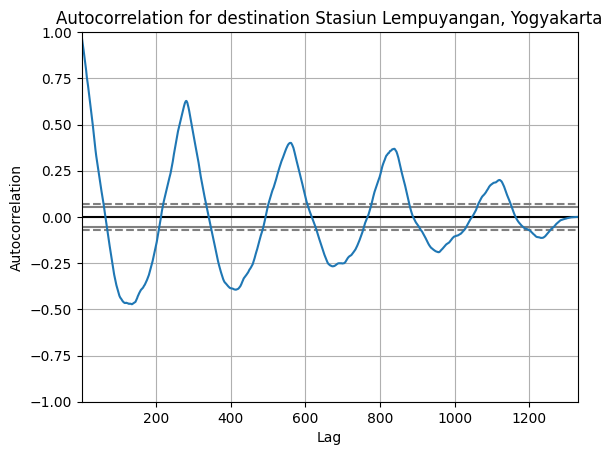

In [30]:
traffic_pivot = traffic.pivot_table(index='timestamp_5min', columns='destination', values='traffic_delay', aggfunc="mean")
pd.plotting.autocorrelation_plot(traffic_pivot['Stasiun Lempuyangan, Yogyakarta'].dropna())
plt.title("Autocorrelation for destination Stasiun Lempuyangan, Yogyakarta")
plt.show()